In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 120,
    "figure.figsize": (12, 6)
})

Creating Dataframe

In [25]:
import glob

classes = ["Hate", "Normal", "Offensive"]
dfs = []

for cls in classes:
    for i in range(1, 5):  # files 1 to 4
        file_name = f"{cls}_Speeches_{i}.csv"
        tmp = pd.read_csv(file_name, usecols=["created_at", "full_text"])
        tmp["class"] = cls
        dfs.append(tmp)

# Combine all files into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce", utc=True)

# Drop invalid dates
df = df.dropna(subset=["created_at"]).reset_index(drop=True)

df["year_month"] = df["created_at"].dt.to_period("D").astype(str)

print(f"Total rows combined: {len(df)}")

Total rows combined: 3061


c:\Users\Dario\miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Overall distribution

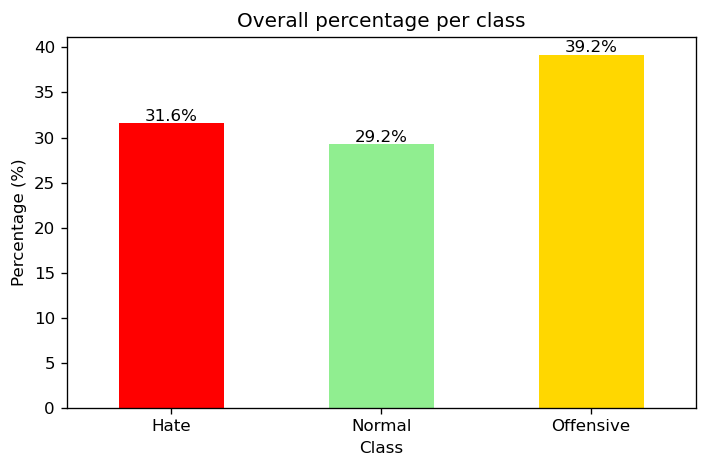

In [12]:
colors = {"Hate": "red", "Normal": "lightgreen", "Offensive": "gold"}
class_percent = df["class"].value_counts(normalize=True).reindex(classes).fillna(0) * 100

plt.figure(figsize=(6,4))
class_percent.plot(kind="bar", color=[colors[c] for c in class_percent.index])
plt.title("Overall percentage per class")
plt.ylabel("Percentage (%)")
plt.xlabel("Class")
plt.xticks(rotation=0)
for i, val in enumerate(class_percent):
    plt.text(i, val + 0.3, f"{val:.1f}%", ha="center")
plt.tight_layout()
plt.show()


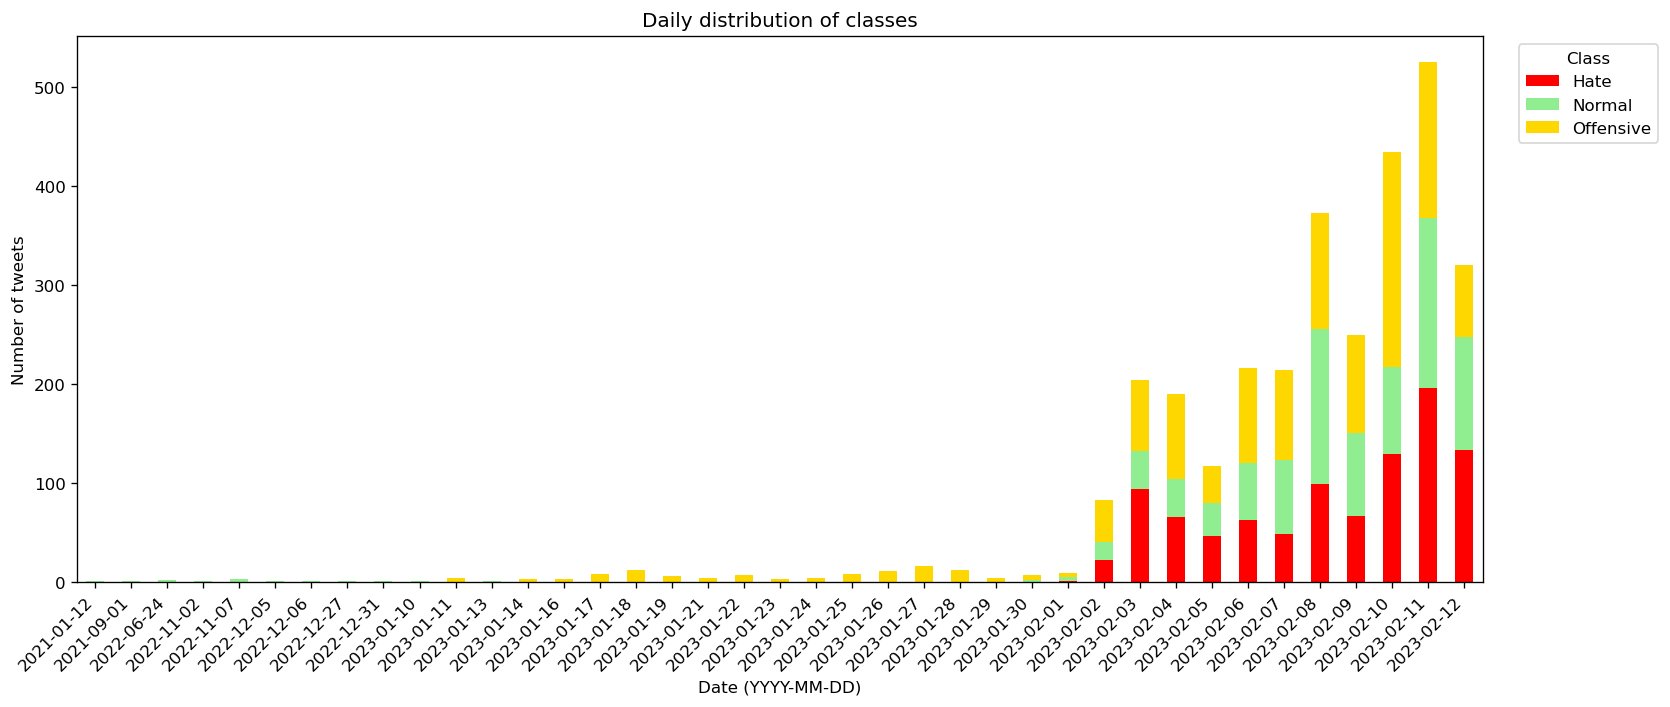

In [18]:
# Cell 7
monthly_counts = df.groupby(["year_month", "class"]).size().unstack(fill_value=0).sort_index()

monthly_counts.plot(kind="bar", stacked=True, figsize=(14,6), color=[colors[c] for c in monthly_counts.columns])
plt.title("Daily distribution of classes")
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


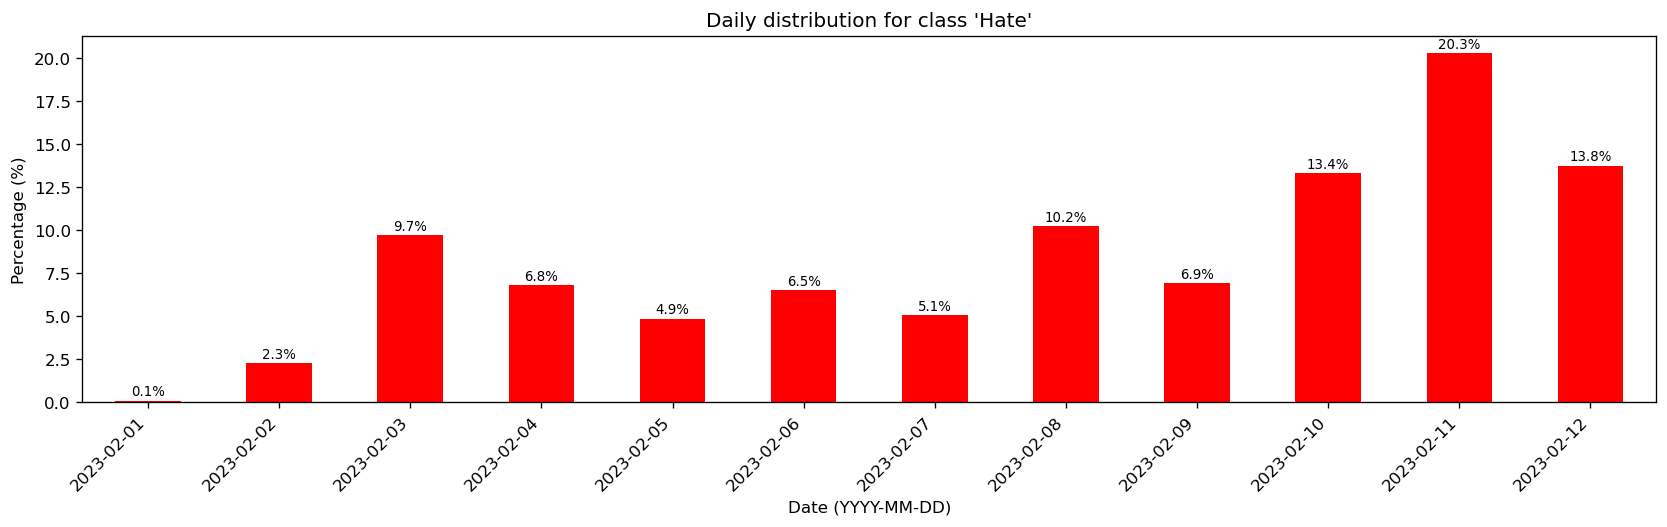

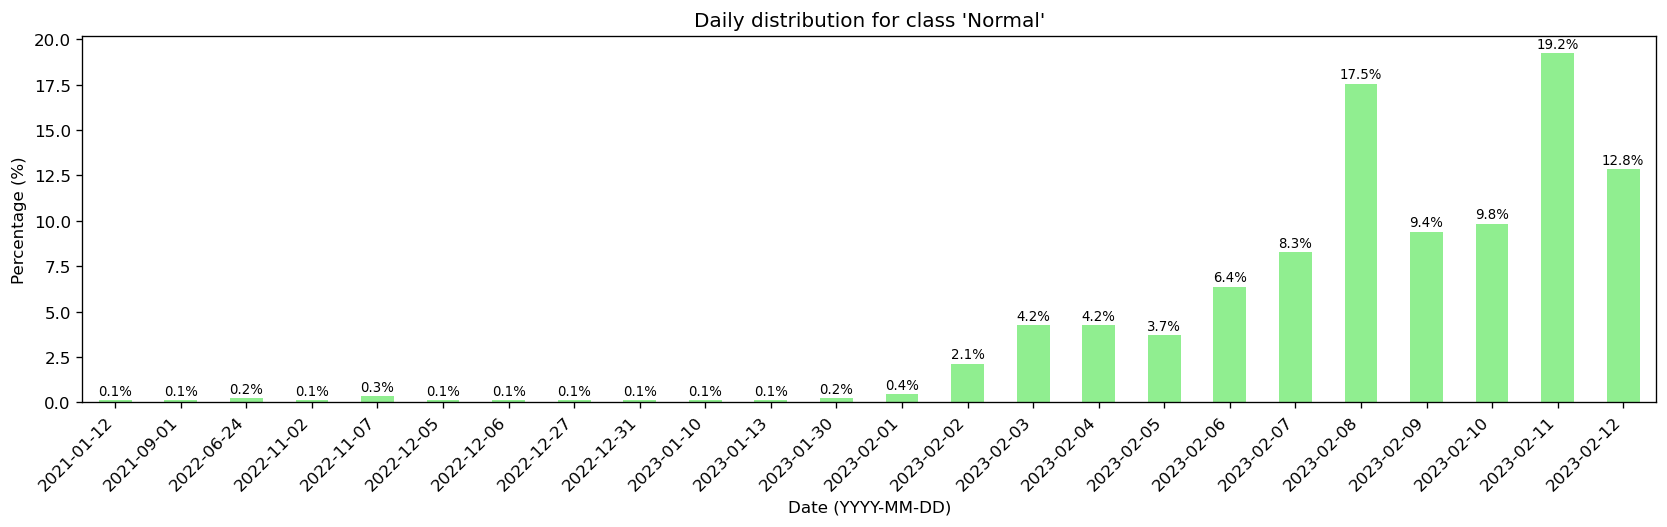

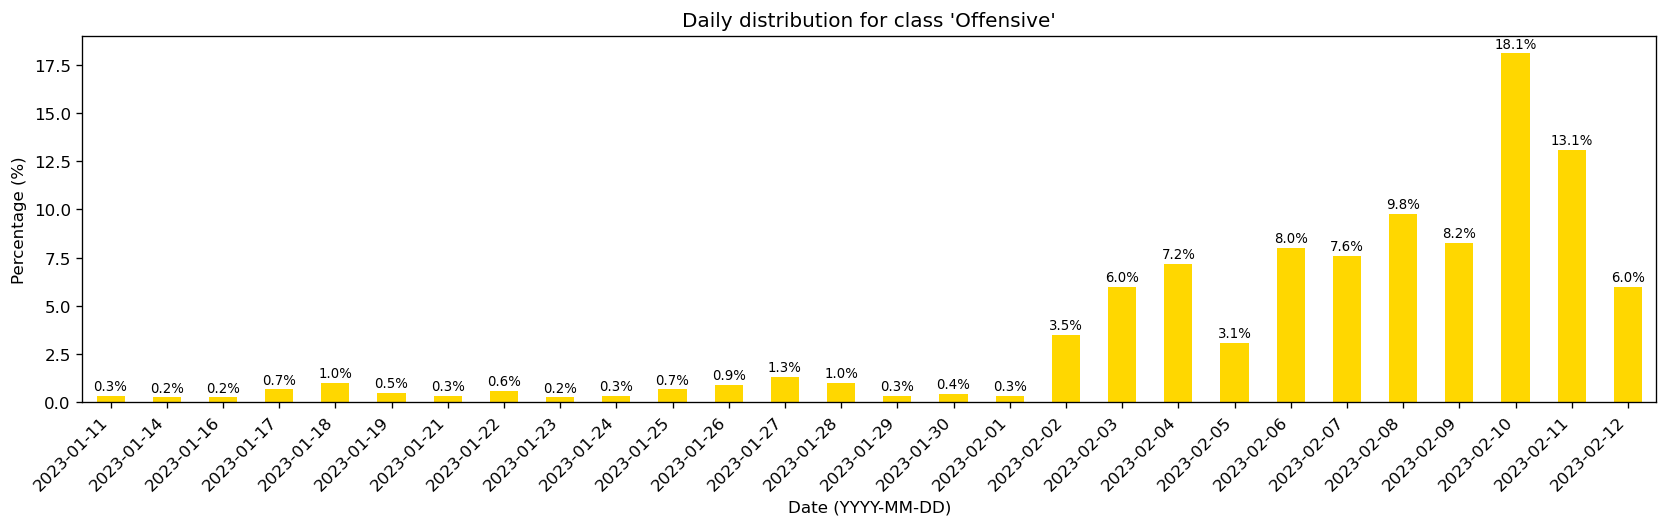

In [22]:
# Cell 9
for cls in classes:
    df_cls = df[df["class"] == cls]
    if df_cls.empty:
        continue
    counts_per_month = df_cls.groupby("year_month").size().sort_index()
    percent_per_month = counts_per_month / counts_per_month.sum() * 100

    plt.figure(figsize=(14,4.5))
    percent_per_month.plot(kind="bar", color=colors[cls])
    plt.title(f"Daily distribution for class '{cls}'")
    plt.xlabel("Date (YYYY-MM-DD)")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha="right")
    for i, val in enumerate(percent_per_month):
        plt.text(i, val + 0.3, f"{val:.1f}%", ha="center", fontsize=8)
    plt.tight_layout()
    plt.show()


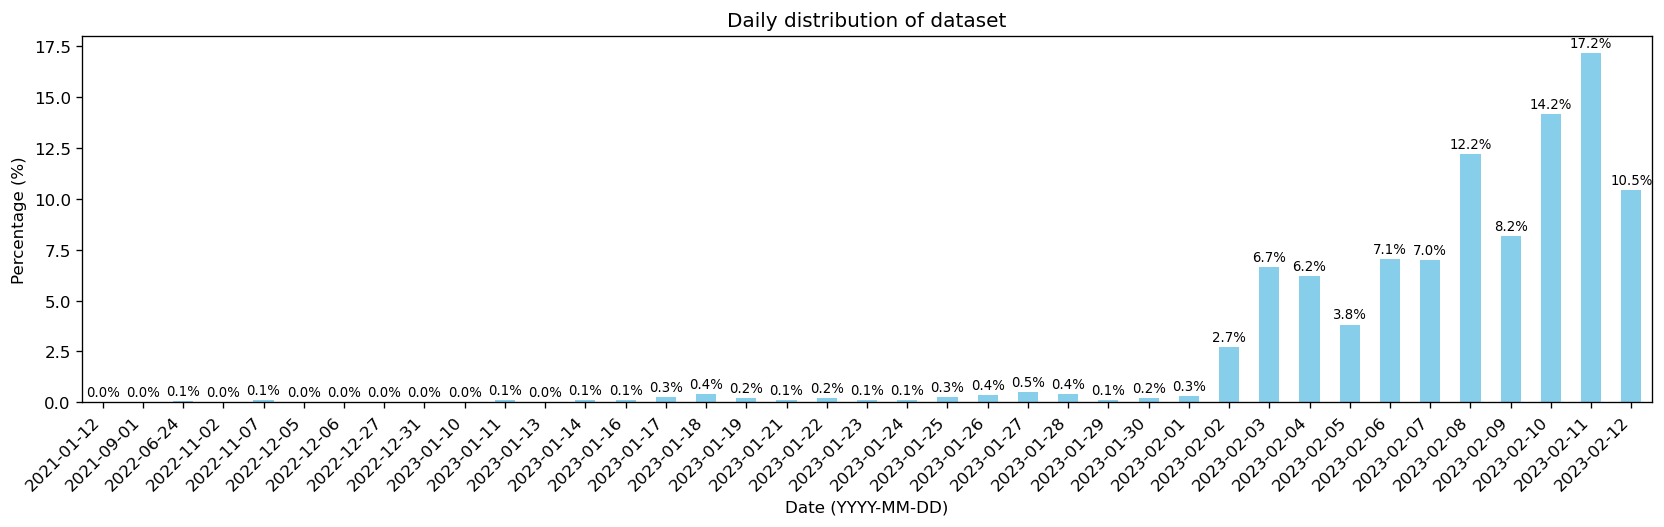

In [24]:
# Cell 10
monthly_totals = monthly_counts.sum(axis=1)
monthly_percent_all = monthly_totals / monthly_totals.sum() * 100

plt.figure(figsize=(14,4.5))
monthly_percent_all.plot(kind="bar", color="skyblue")
plt.title("Daily distribution of dataset")
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
for i, val in enumerate(monthly_percent_all):
    plt.text(i, val + 0.3, f"{val:.1f}%", ha="center", fontsize=8)
plt.tight_layout()
plt.show()


Outliers

In [ ]:
target_date = "2023-01-01"
df_filtered = df[df["created_at"].dt.date < pd.to_datetime(target_date).date()]

display(df_filtered)

,created_at,full_text,class,year_month
1011,2022-12-06 00:00:01+00:00,Experience the Italian art of good living thro...,Normal,2022-12-06
1012,2022-11-07 08:58:10+00:00,Pawfect customized doormat for pet lovers \nHu...,Normal,2022-11-07
1013,2021-01-12 02:01:03+00:00,"Factual news in as few words as possible, deli...",Normal,2021-01-12
1119,2022-06-24 14:47:00+00:00,The #DEX butterfly effect: What is the true co...,Normal,2022-06-24
1121,2021-09-01 17:22:15+00:00,If you or a loved one are a survivor of sexual...,Normal,2021-09-01
1213,2022-12-27 15:58:30+00:00,Emergency Survival Kits ⛑\n\nWe build premium ...,Normal,2022-12-27
1234,2022-11-07 08:58:10+00:00,Pawfect customized doormat for pet lovers \nHu...,Normal,2022-11-07
1235,2022-11-02 08:57:49+00:00,Surf the web faster and safety with new BRAVE ...,Normal,2022-11-02
1675,2022-12-31 07:25:23+00:00,😍Installation takes only 60s\n🏡Keep your famil...,Normal,2022-12-31
1676,2022-12-05 17:18:41+00:00,Why Family First Life? Here is why!,Normal,2022-12-05
